# 머신러닝 모델 평가 종합 실습

## 목표
- 이진분류 모델 평가지표 이해 및 실습
- 회귀 모델 평가지표 이해 및 실습
- 혼동행렬, ROC 곡선, 회귀 평가지표 시각화

## 사용 데이터셋
- **유방암 데이터셋**: 이진분류 평가 실습
- **캘리포니아 주택가격 데이터셋**: 회귀 평가 실습
- **아이리스 데이터셋**: 데이터 시각화 예시

## 1. 라이브러리 Import 및 환경 설정

In [6]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 머신러닝 라이브러리
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

# 평가 지표
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_curve, roc_auc_score, mean_absolute_error, 
                           mean_squared_error, r2_score)

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 import 완료")

라이브러리 import 완료


## 2. 이진분류 모델 평가 (유방암 데이터셋)

### 2.1 데이터 준비 및 전처리

In [7]:
# 유방암 데이터셋 로드
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# 타겟 변수 변환 (0: 악성(malignant) -> 1, 1: 양성(benign) -> 0)
# 원래: 0=악성, 1=양성 → 변환후: 1=악성, 0=양성
y_changed = np.where(y == 0, 1, 0)

print("=== 유방암 데이터셋 정보 ===")
print(f"특성 수: {X.shape[1]}")
print(f"샘플 수: {X.shape[0]}")
print(f"\n원본 타겟 (처음 20개): {y[:20]}")
print(f"변환된 타겟 (처음 20개): {y_changed[:20]}")
print(f"\n클래스 분포: {dict(zip(*np.unique(y_changed, return_counts=True)))}")
print("0: 양성(benign), 1: 악성(malignant)")

=== 유방암 데이터셋 정보 ===
특성 수: 30
샘플 수: 569

원본 타겟 (처음 20개): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
변환된 타겟 (처음 20개): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

클래스 분포: {np.int64(0): np.int64(357), np.int64(1): np.int64(212)}
0: 양성(benign), 1: 악성(malignant)


In [8]:
# 데이터 분할 (훈련:테스트 = 75:25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_changed, test_size=0.25, random_state=1, stratify=y_changed
)

# 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== 데이터 분할 결과 ===")
print(f"훈련 세트: {X_train.shape[0]}개")
print(f"테스트 세트: {X_test.shape[0]}개")
print(f"훈련 세트 클래스 분포: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"테스트 세트 클래스 분포: {dict(zip(*np.unique(y_test, return_counts=True)))}")

=== 데이터 분할 결과 ===
훈련 세트: 426개
테스트 세트: 143개
훈련 세트 클래스 분포: {np.int64(0): np.int64(267), np.int64(1): np.int64(159)}
테스트 세트 클래스 분포: {np.int64(0): np.int64(90), np.int64(1): np.int64(53)}


In [9]:
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=1, solver='liblinear')
model.fit(X_train_scaled, y_train)

print("=== 모델 학습 완료 ===")
print(f"모델 타입: {type(model).__name__}")
print(f"특성 개수: {len(model.coef_[0])}")
print(f"훈련 정확도: {model.score(X_train_scaled, y_train):.4f}")
print(f"테스트 정확도: {model.score(X_test_scaled, y_test):.4f}")

=== 모델 학습 완료 ===
모델 타입: LogisticRegression
특성 개수: 30
훈련 정확도: 0.9930
테스트 정확도: 0.9650


### 2.2 모델 학습 및 예측

In [10]:
# 예측 수행
y_pred = model.predict(X_test_scaled)  # 클래스 예측
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # 확률 예측 (악성 클래스)

print("=== 예측 완료 ===")
print(f"예측된 클래스 (처음 10개): {y_pred[:10]}")
print(f"악성 확률 (처음 10개): {y_pred_proba[:10].round(3)}")
print(f"실제 클래스 (처음 10개): {y_test[:10]}")

=== 예측 완료 ===
예측된 클래스 (처음 10개): [0 0 1 0 0 0 0 0 0 1]
악성 확률 (처음 10개): [0.002 0.004 1.    0.001 0.    0.084 0.002 0.027 0.    0.999]
실제 클래스 (처음 10개): [0 0 1 0 0 1 0 0 0 1]


In [11]:
# 혼동행렬(Confusion Matrix) 계산
cm = confusion_matrix(y_test, y_pred)

print("=== 혼동행렬 ===")
print("     예측")
print("      양성  악성")
print(f"실제 양성  {cm[0,0]}   {cm[0,1]}")
print(f"    악성  {cm[1,0]}   {cm[1,1]}")
print(f"\nTN(True Negative): {cm[0,0]} - 양성을 양성으로 예측")
print(f"FP(False Positive): {cm[0,1]} - 양성을 악성으로 예측")
print(f"FN(False Negative): {cm[1,0]} - 악성을 양성으로 예측")
print(f"TP(True Positive): {cm[1,1]} - 악성을 악성으로 예측")

=== 혼동행렬 ===
     예측
      양성  악성
실제 양성  89   1
    악성  4   49

TN(True Negative): 89 - 양성을 양성으로 예측
FP(False Positive): 1 - 양성을 악성으로 예측
FN(False Negative): 4 - 악성을 양성으로 예측
TP(True Positive): 49 - 악성을 악성으로 예측


### 2.3 모델 평가

In [12]:
# 분류 리포트 (정밀도, 재현율, F1-score)
report = classification_report(y_test, y_pred, target_names=['양성', '악성'])

print("=== 분류 리포트 ===")
print(report)
print("\n용어 설명:")
print("- Precision(정밀도): 예측한 양성 중 실제 양성의 비율")
print("- Recall(재현율): 실제 양성 중 예측한 양성의 비율") 
print("- F1-score: 정밀도와 재현율의 조화평균")
print("- Support: 각 클래스의 실제 개수")

=== 분류 리포트 ===
              precision    recall  f1-score   support

          양성       0.96      0.99      0.97        90
          악성       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


용어 설명:
- Precision(정밀도): 예측한 양성 중 실제 양성의 비율
- Recall(재현율): 실제 양성 중 예측한 양성의 비율
- F1-score: 정밀도와 재현율의 조화평균
- Support: 각 클래스의 실제 개수


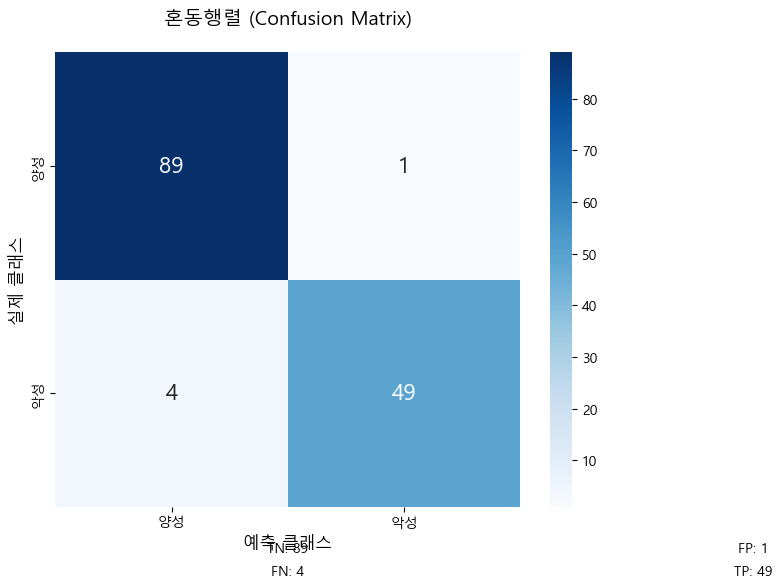

In [13]:
# 혼동행렬 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['양성', '악성'], yticklabels=['양성', '악성'],
            annot_kws={'size': 16})
plt.xlabel('예측 클래스', fontsize=12)
plt.ylabel('실제 클래스', fontsize=12)
plt.title('혼동행렬 (Confusion Matrix)', fontsize=14, pad=20)

# 각 셀에 대한 설명 추가
plt.text(0.5, -0.1, f'TN: {cm[0,0]}', ha='center', transform=plt.gca().transAxes)
plt.text(1.5, -0.1, f'FP: {cm[0,1]}', ha='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, f'FN: {cm[1,0]}', ha='center', transform=plt.gca().transAxes)
plt.text(1.5, -0.15, f'TP: {cm[1,1]}', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### 2.4 시각화

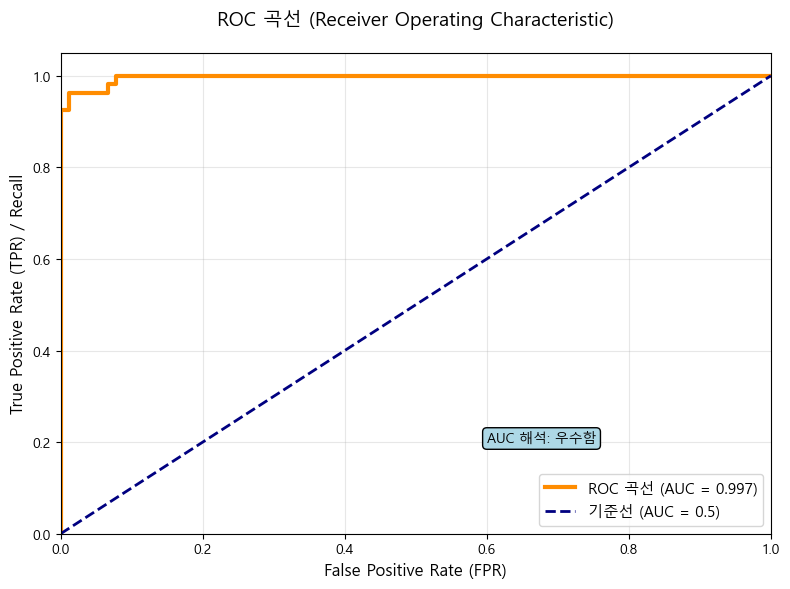

AUC 점수: 0.9969
AUC 해석: 1에 가까울수록 좋은 성능, 0.5는 랜덤 수준


In [14]:
# ROC 곡선 및 AUC 점수 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=3, 
         label=f'ROC 곡선 (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='기준선 (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('ROC 곡선 (Receiver Operating Characteristic)', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# AUC 점수 해석 추가
if auc_score >= 0.9:
    interpretation = "우수함"
elif auc_score >= 0.8:
    interpretation = "좋음"
elif auc_score >= 0.7:
    interpretation = "보통"
else:
    interpretation = "개선 필요"
    
plt.text(0.6, 0.2, f'AUC 해석: {interpretation}', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"AUC 점수: {auc_score:.4f}")
print("AUC 해석: 1에 가까울수록 좋은 성능, 0.5는 랜덤 수준")

## 3. 데이터 시각화 예시 (아이리스 데이터셋)

### 3.1 한글 폰트 확인 및 설정

In [15]:
# 시스템에 설치된 한글 폰트 확인
fontlist = [font.name for font in fm.fontManager.ttflist]
korean_fonts = [font for font in fontlist if any(keyword in font for keyword in 
                ['Malgun', 'Gothic', 'Nanum', 'Dotum', 'Gulim', 'Batang'])]

print("=== 사용 가능한 한글 폰트 ===")
for font in korean_fonts[:10]:  # 상위 10개만 출력
    print(f"- {font}")
    
if 'Malgun Gothic' in fontlist:
    print("\n✅ Malgun Gothic 폰트 사용 가능")
else:
    print("\n❌ Malgun Gothic 폰트 없음 - 다른 한글 폰트 사용 권장")

print(f"\n현재 설정된 폰트: {plt.rcParams['font.family']}")

=== 사용 가능한 한글 폰트 ===
- Franklin Gothic Medium
- Malgun Gothic
- Franklin Gothic Book
- Franklin Gothic Book
- HYGothic-Extra
- HCR Dotum
- Yu Gothic
- NanumBarunGothic
- Franklin Gothic Demi
- HCR Batang ExtB

✅ Malgun Gothic 폰트 사용 가능

현재 설정된 폰트: ['Malgun Gothic']


=== 아이리스 데이터셋 정보 ===
데이터 크기: (150, 5)
특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
클래스: ['setosa' 'versicolor' 'virginica']

클래스별 개수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

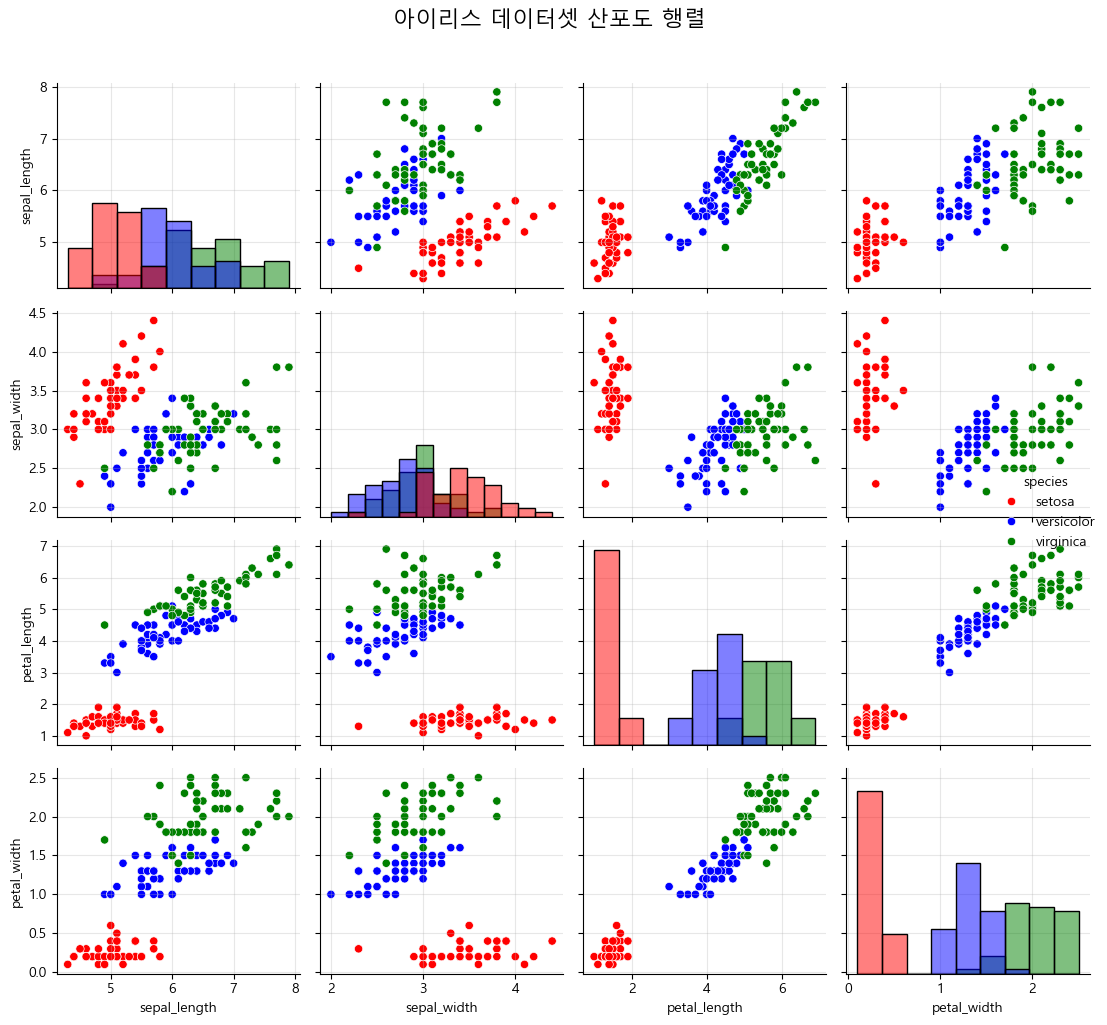


산포도 행렬 해석:
- 대각선: 각 특성의 분포(히스토그램)
- 비대각선: 특성 간의 관계(산포도)
- 색상: 품종별 구분


In [16]:
# 아이리스 데이터셋 로드 및 기본 정보
iris = sns.load_dataset("iris")

print("=== 아이리스 데이터셋 정보 ===")
print(f"데이터 크기: {iris.shape}")
print(f"특성: {list(iris.columns[:-1])}")
print(f"클래스: {iris['species'].unique()}")
print(f"\n클래스별 개수:")
print(iris['species'].value_counts())

# 산포도 행렬(Pairplot) 생성
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(iris, hue='species', height=2.5, 
                       palette=['red', 'blue', 'green'],
                       diag_kind='hist')
pairplot.fig.suptitle('아이리스 데이터셋 산포도 행렬', 
                     fontsize=16, y=1.02)

# 범례 개선
for ax in pairplot.axes.flatten():
    if ax:
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n산포도 행렬 해석:")
print("- 대각선: 각 특성의 분포(히스토그램)")
print("- 비대각선: 특성 간의 관계(산포도)")
print("- 색상: 품종별 구분")

### 3.2 아이리스 데이터셋 시각화

## 4. 회귀 모델 평가 (캘리포니아 주택가격 데이터셋)

### 4.1 데이터 준비 및 전처리

In [17]:
# 캘리포니아 주택가격 데이터셋 로드
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="house_value")

print("=== 캘리포니아 주택가격 데이터셋 정보 ===")
print(f"데이터 크기: {X.shape}")
print(f"특성: {list(X.columns)}")
print(f"타겟 변수: {y.name} (단위: 10만 달러)")
print(f"\n타겟 변수 통계:")
print(f"- 평균: ${y.mean():.2f}만 달러")
print(f"- 최소값: ${y.min():.2f}만 달러") 
print(f"- 최대값: ${y.max():.2f}만 달러")
print(f"- 표준편차: ${y.std():.2f}만 달러")

=== 캘리포니아 주택가격 데이터셋 정보 ===
데이터 크기: (20640, 8)
특성: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
타겟 변수: house_value (단위: 10만 달러)

타겟 변수 통계:
- 평균: $2.07만 달러
- 최소값: $0.15만 달러
- 최대값: $5.00만 달러
- 표준편차: $1.15만 달러


In [18]:
# 데이터 탐색
print("=== 특성 데이터 샘플 ===")
print(X.head())

print(f"\n=== 특성 설명 ===")
feature_descriptions = {
    'MedInc': '중위 소득',
    'HouseAge': '주택 연식',
    'AveRooms': '평균 방 개수',
    'AveBedrms': '평균 침실 개수',
    'Population': '인구',
    'AveOccup': '평균 거주자 수',
    'Latitude': '위도',
    'Longitude': '경도'
}

for col, desc in feature_descriptions.items():
    print(f"- {col}: {desc}")

print(f"\n=== 타겟 변수 샘플 ===")
print(f"처음 10개 주택 가격: {y[:10].values} (단위: 10만 달러)")

=== 특성 데이터 샘플 ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

=== 특성 설명 ===
- MedInc: 중위 소득
- HouseAge: 주택 연식
- AveRooms: 평균 방 개수
- AveBedrms: 평균 침실 개수
- Population: 인구
- AveOccup: 평균 거주자 수
- Latitude: 위도
- Longitude: 경도

=== 타겟 변수 샘플 ===
처음 10개 주택 가격: [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611] (단위: 10만 달러)


In [19]:
# 데이터 분할 (훈련:테스트 = 80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=== 데이터 분할 결과 ===")
print(f"전체 데이터: {X.shape[0]:,}개")
print(f"훈련 데이터: {X_train.shape[0]:,}개 ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"테스트 데이터: {X_test.shape[0]:,}개 ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
print(f"\n훈련 세트 타겟 통계:")
print(f"- 평균: ${y_train.mean():.2f}만 달러")
print(f"- 표준편차: ${y_train.std():.2f}만 달러")
print(f"\n테스트 세트 타겟 통계:")
print(f"- 평균: ${y_test.mean():.2f}만 달러")
print(f"- 표준편차: ${y_test.std():.2f}만 달러")

=== 데이터 분할 결과 ===
전체 데이터: 20,640개
훈련 데이터: 16,512개 (80.0%)
테스트 데이터: 4,128개 (20.0%)

훈련 세트 타겟 통계:
- 평균: $2.07만 달러
- 표준편차: $1.16만 달러

테스트 세트 타겟 통계:
- 평균: $2.06만 달러
- 표준편차: $1.14만 달러


In [20]:
# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== 스케일링 결과 ===")
print("스케일링 전 훈련 데이터 통계:")
print(f"- 평균: {X_train.mean().round(2).to_dict()}")
print(f"- 표준편차: {X_train.std().round(2).to_dict()}")

print("\n스케일링 후 훈련 데이터 통계:")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(f"- 평균: {X_train_scaled_df.mean().round(2).to_dict()}")
print(f"- 표준편차: {X_train_scaled_df.std().round(2).to_dict()}")
print("\n✅ 모든 특성이 평균 0, 표준편차 1로 표준화됨")

=== 스케일링 결과 ===
스케일링 전 훈련 데이터 통계:
- 평균: {'MedInc': 3.88, 'HouseAge': 28.61, 'AveRooms': 5.44, 'AveBedrms': 1.1, 'Population': 1426.45, 'AveOccup': 3.1, 'Latitude': 35.64, 'Longitude': -119.58}
- 표준편차: {'MedInc': 1.9, 'HouseAge': 12.6, 'AveRooms': 2.39, 'AveBedrms': 0.43, 'Population': 1137.06, 'AveOccup': 11.58, 'Latitude': 2.14, 'Longitude': 2.01}

스케일링 후 훈련 데이터 통계:
- 평균: {'MedInc': -0.0, 'HouseAge': -0.0, 'AveRooms': -0.0, 'AveBedrms': -0.0, 'Population': -0.0, 'AveOccup': 0.0, 'Latitude': 0.0, 'Longitude': 0.0}
- 표준편차: {'MedInc': 1.0, 'HouseAge': 1.0, 'AveRooms': 1.0, 'AveBedrms': 1.0, 'Population': 1.0, 'AveOccup': 1.0, 'Latitude': 1.0, 'Longitude': 1.0}

✅ 모든 특성이 평균 0, 표준편차 1로 표준화됨


In [21]:
# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("=== 모델 학습 완료 ===")
print(f"모델 타입: {type(model).__name__}")
print(f"특성 개수: {len(model.coef_)}")
print(f"절편(intercept): {model.intercept_:.4f}")

# 특성별 회귀계수 확인
print(f"\n=== 회귀 계수 ===")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    print(f"- {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\n훈련 세트 R² 점수: {model.score(X_train_scaled, y_train):.4f}")
print(f"테스트 세트 R² 점수: {model.score(X_test_scaled, y_test):.4f}")

=== 모델 학습 완료 ===
모델 타입: LinearRegression
특성 개수: 8
절편(intercept): 2.0719

=== 회귀 계수 ===
- Latitude: -0.8969
- Longitude: -0.8698
- MedInc: 0.8544
- AveBedrms: 0.3393
- AveRooms: -0.2944
- HouseAge: 0.1225
- AveOccup: -0.0408
- Population: -0.0023

훈련 세트 R² 점수: 0.6126
테스트 세트 R² 점수: 0.5758


### 4.2 모델 학습 및 예측

In [22]:
# 예측 수행
y_pred = model.predict(X_test_scaled)

print("=== 예측 결과 ===")
print("실제 vs 예측 (처음 10개):")
comparison_df = pd.DataFrame({
    '실제값': y_test[:10].values,
    '예측값': y_pred[:10],
    '차이': (y_test[:10].values - y_pred[:10])
})
comparison_df['실제값'] = comparison_df['실제값'].round(2)
comparison_df['예측값'] = comparison_df['예측값'].round(2)
comparison_df['차이'] = comparison_df['차이'].round(2)

print(comparison_df.to_string(index=False))

print(f"\n예측값 통계:")
print(f"- 평균: ${y_pred.mean():.2f}만 달러")
print(f"- 최소값: ${y_pred.min():.2f}만 달러")
print(f"- 최대값: ${y_pred.max():.2f}만 달러")
print(f"- 표준편차: ${y_pred.std():.2f}만 달러")

=== 예측 결과 ===
실제 vs 예측 (처음 10개):
 실제값  예측값    차이
0.48 0.72 -0.24
0.46 1.76 -1.31
5.00 2.71  2.29
2.19 2.84 -0.65
2.78 2.60  0.18
1.59 2.01 -0.42
1.98 2.65 -0.66
1.58 2.17 -0.59
3.40 2.74  0.66
4.47 3.92  0.55

예측값 통계:
- 평균: $2.05만 달러
- 최소값: $-1.01만 달러
- 최대값: $11.50만 달러
- 표준편차: $0.92만 달러


In [23]:
# 회귀 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== 회귀 모델 평가 지표 ===")
print(f"MAE (평균 절대 오차): {mae:.4f} (만 달러)")
print(f"MSE (평균 제곱 오차): {mse:.4f}")
print(f"RMSE (평균 제곱근 오차): {rmse:.4f} (만 달러)")
print(f"R² (결정 계수): {r2:.4f}")
print(f"모델 score(): {model.score(X_test_scaled, y_test):.4f}")

print(f"\n=== 평가 지표 해석 ===")
print(f"- MAE: 평균적으로 {mae:.2f}만 달러 차이")
print(f"- RMSE: 표준편차 개념으로 {rmse:.2f}만 달러 차이")
print(f"- R²: 모델이 {r2*100:.1f}%의 분산을 설명")

# R² 점수 해석
if r2 >= 0.9:
    r2_interpretation = "매우 좋음"
elif r2 >= 0.8:
    r2_interpretation = "좋음"
elif r2 >= 0.7:
    r2_interpretation = "보통"
elif r2 >= 0.5:
    r2_interpretation = "나쁨"
else:
    r2_interpretation = "매우 나쁨"

print(f"- 모델 성능: {r2_interpretation}")

# 평균 대비 오차율
mean_price = y_test.mean()
error_rate = (mae / mean_price) * 100
print(f"- 평균 대비 오차율: {error_rate:.1f}%")

=== 회귀 모델 평가 지표 ===
MAE (평균 절대 오차): 0.5332 (만 달러)
MSE (평균 제곱 오차): 0.5559
RMSE (평균 제곱근 오차): 0.7456 (만 달러)
R² (결정 계수): 0.5758
모델 score(): 0.5758

=== 평가 지표 해석 ===
- MAE: 평균적으로 0.53만 달러 차이
- RMSE: 표준편차 개념으로 0.75만 달러 차이
- R²: 모델이 57.6%의 분산을 설명
- 모델 성능: 나쁨
- 평균 대비 오차율: 25.9%


### 4.3 회귀 평가 지표

In [24]:
# 시각화를 위한 데이터 준비
print("=== 시각화용 데이터 샘플링 ===")
print(f"전체 데이터 크기: {X.shape}")

# 타겟 변수를 특성 데이터에 추가
X_with_target = X.copy()
X_with_target["house_value"] = y

# 시각화 성능을 위해 2000개 샘플링
df_sample = X_with_target.sample(n=2000, random_state=42)
print(f"샘플링된 데이터 크기: {df_sample.shape}")

print("\n샘플 데이터 미리보기:")
print(df_sample.head())

print(f"\n샘플 데이터 통계:")
print(f"- 평균 주택가격: ${df_sample['house_value'].mean():.2f}만 달러")
print(f"- 최소 주택가격: ${df_sample['house_value'].min():.2f}만 달러")
print(f"- 최대 주택가격: ${df_sample['house_value'].max():.2f}만 달러")

=== 시각화용 데이터 샘플링 ===
전체 데이터 크기: (20640, 8)
샘플링된 데이터 크기: (2000, 9)

샘플 데이터 미리보기:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude  house_value  
20046    -119.01      0.47700  
3024     -119.46      0.45800  
15663    -122.44      5.00001  
20484    -118.72      2.18600  
9814     -121.93      2.78000  

샘플 데이터 통계:
- 평균 주택가격: $2.07만 달러
- 최소 주택가격: $0.30만 달러
- 최대 주택가격: $5.00만 달러


### 4.4 회귀 결과 시각화

<Figure size 1500x1200 with 0 Axes>

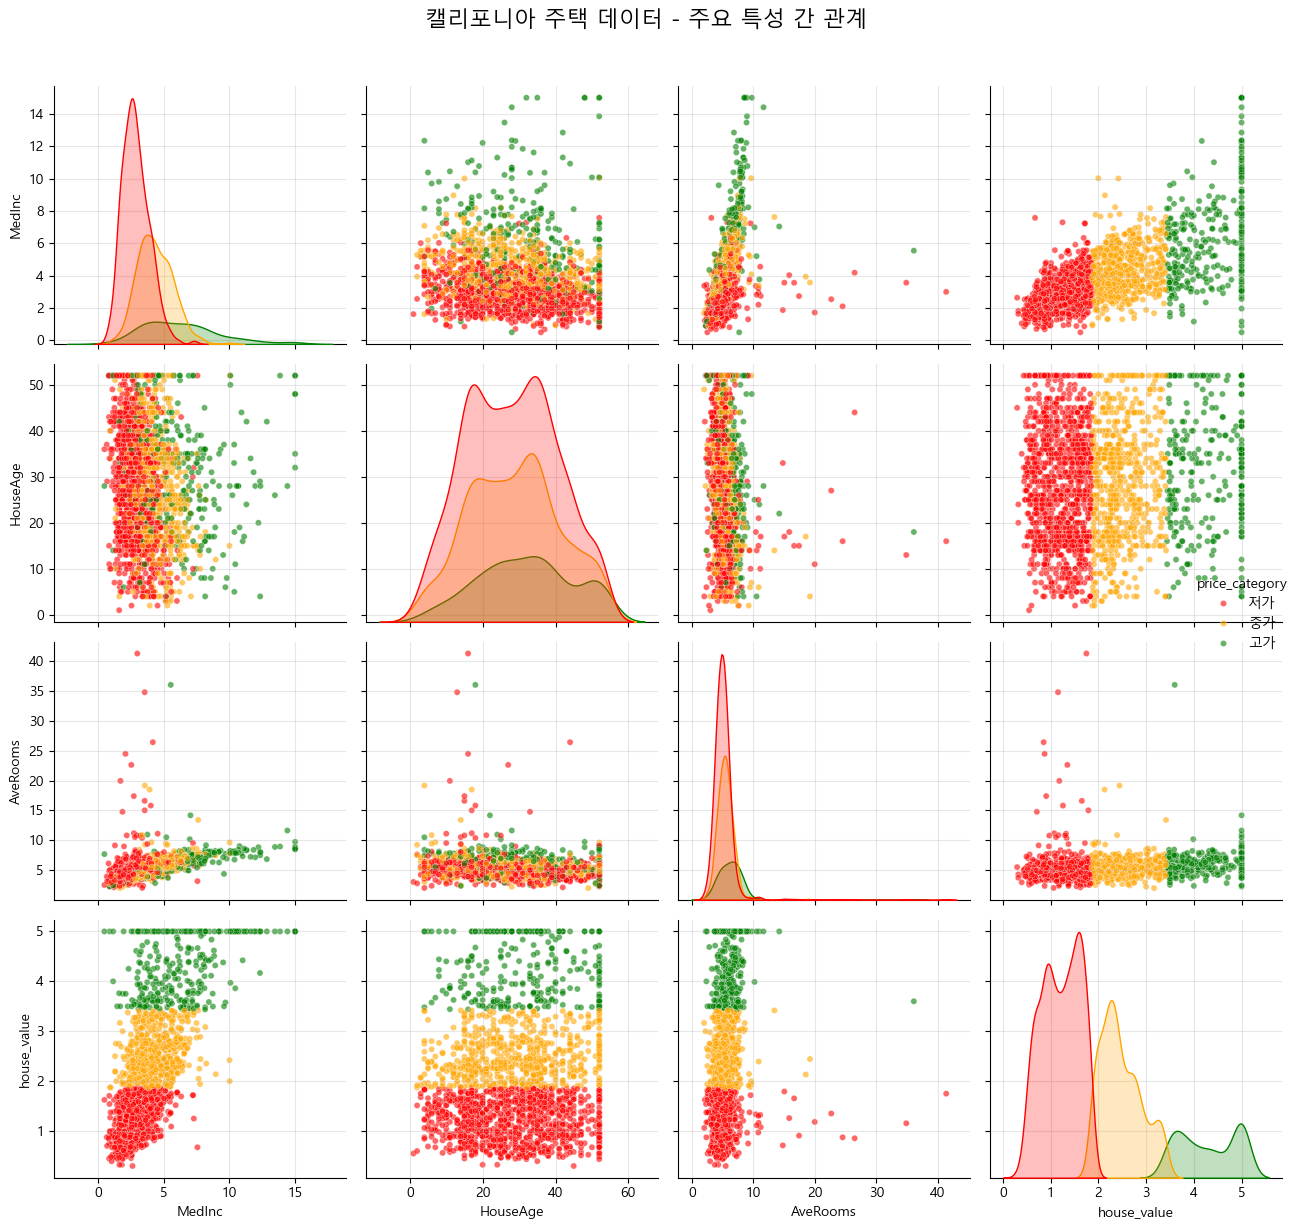

=== 산포도 행렬 해석 ===
- MedInc (중위소득): 주택가격과 강한 양의 상관관계
- HouseAge (주택연식): 주택가격과 약한 관계
- AveRooms (평균방수): 주택가격과 양의 상관관계
- 색상별 구분: 주택가격 구간 (저가/중가/고가)

=== 상관관계 매트릭스 ===
             MedInc  HouseAge  AveRooms  house_value
MedInc        1.000    -0.108     0.399        0.672
HouseAge     -0.108     1.000    -0.181        0.106
AveRooms      0.399    -0.181     1.000        0.187
house_value   0.672     0.106     0.187        1.000


In [25]:
# 특성 간 관계 및 주택가격과의 상관관계 시각화
plt.figure(figsize=(15, 12))

# 주택가격 구간 생성 (시각화를 위해)
df_sample['price_category'] = pd.cut(df_sample['house_value'], 
                                   bins=3, 
                                   labels=['저가', '중가', '고가'])

# 주요 특성들만 선택하여 pairplot 생성
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'house_value']
df_selected = df_sample[selected_features + ['price_category']]

# 산포도 행렬 생성
pairplot = sns.pairplot(df_selected, 
                       hue='price_category',
                       height=3,
                       palette=['red', 'orange', 'green'],
                       diag_kind='kde',
                       plot_kws={'alpha': 0.6, 's': 20})

pairplot.fig.suptitle('캘리포니아 주택 데이터 - 주요 특성 간 관계', 
                     fontsize=16, y=1.02)

# 범례 개선
for ax in pairplot.axes.flatten():
    if ax:
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== 산포도 행렬 해석 ===")
print("- MedInc (중위소득): 주택가격과 강한 양의 상관관계")
print("- HouseAge (주택연식): 주택가격과 약한 관계")
print("- AveRooms (평균방수): 주택가격과 양의 상관관계")
print("- 색상별 구분: 주택가격 구간 (저가/중가/고가)")

# 상관관계 매트릭스
print("\n=== 상관관계 매트릭스 ===")
correlation_matrix = df_sample[selected_features].corr()
print(correlation_matrix.round(3))

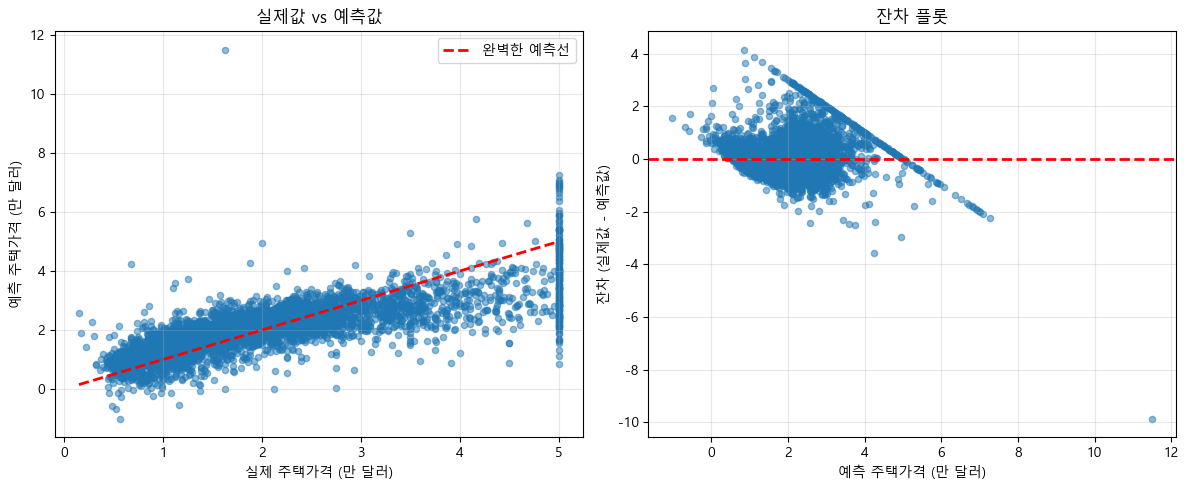

=== 시각화 해석 ===
1. 실제값 vs 예측값:
   - 점들이 빨간 대각선에 가까울수록 좋은 예측
   - 산포가 클수록 예측 오차가 큼

2. 잔차 플롯:
   - 잔차가 0 주변에 무작위로 분포하면 좋은 모델
   - 패턴이 있다면 모델 개선이 필요

=== 잔차 통계 ===
잔차 평균: 0.0035
잔차 표준편차: 0.7457
잔차 최대값: 4.1484
잔차 최소값: -9.8753


In [26]:
# 실제값 vs 예측값 산포도
plt.figure(figsize=(12, 5))

# 서브플롯 1: 실제값 vs 예측값
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='완벽한 예측선')
plt.xlabel('실제 주택가격 (만 달러)')
plt.ylabel('예측 주택가격 (만 달러)')
plt.title('실제값 vs 예측값')
plt.legend()
plt.grid(True, alpha=0.3)

# 서브플롯 2: 잔차 플롯 (예측값 vs 잔차)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('예측 주택가격 (만 달러)')
plt.ylabel('잔차 (실제값 - 예측값)')
plt.title('잔차 플롯')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== 시각화 해석 ===")
print("1. 실제값 vs 예측값:")
print("   - 점들이 빨간 대각선에 가까울수록 좋은 예측")
print("   - 산포가 클수록 예측 오차가 큼")
print("\n2. 잔차 플롯:")
print("   - 잔차가 0 주변에 무작위로 분포하면 좋은 모델")
print("   - 패턴이 있다면 모델 개선이 필요")

# 잔차 통계
print(f"\n=== 잔차 통계 ===")
print(f"잔차 평균: {residuals.mean():.4f}")
print(f"잔차 표준편차: {residuals.std():.4f}")
print(f"잔차 최대값: {residuals.max():.4f}")
print(f"잔차 최소값: {residuals.min():.4f}")

## 5. 결론 및 요약

### 5.1 이진분류 모델 (유방암 진단)
- **모델**: 로지스틱 회귀
- **평가지표**: 혼동행렬, 정밀도, 재현율, F1-score, ROC-AUC
- **주요 결과**: 의료 진단에서는 False Negative(악성을 양성으로 잘못 예측)를 최소화하는 것이 중요

### 5.2 회귀 모델 (주택가격 예측)
- **모델**: 선형 회귀
- **평가지표**: MAE, MSE, RMSE, R²
- **주요 결과**: 중위소득이 주택가격 예측에 가장 중요한 특성

### 5.3 학습한 내용
1. **이진분류 평가**: 혼동행렬과 ROC 곡선을 통한 모델 성능 평가
2. **회귀 평가**: 다양한 오차 지표를 통한 예측 정확도 측정
3. **시각화**: 데이터와 모델 성능을 직관적으로 이해하는 방법
4. **실무 적용**: 도메인에 따른 적절한 평가지표 선택의 중요성

### 5.4 다음 단계
- 다른 알고리즘(랜덤 포레스트, SVM 등) 비교
- 특성 엔지니어링을 통한 모델 성능 개선
- 교차 검증을 통한 더 robust한 평가
- 하이퍼파라미터 튜닝